In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Jharkhand-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,0,14.26,1.0,1,1,2011,71.50,313.31,3.00
1,1,11.28,1.0,2,1,2011,53.81,319.56,1.87
2,2,11.08,1.0,3,1,2011,52.38,341.06,1.48
3,3,9.90,1.0,4,1,2011,57.88,343.50,1.38
4,4,9.97,1.0,5,1,2011,56.44,322.31,1.45
...,...,...,...,...,...,...,...,...,...
3738,3738,26.26,1.0,27,3,2021,18.62,267.25,1.75
3739,3739,27.65,1.0,28,3,2021,21.06,216.38,1.25
3740,3740,28.44,1.0,29,3,2021,23.06,258.12,2.44
3741,3741,29.49,1.0,30,3,2021,18.25,273.81,3.54


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "DY","MO","YEAR","RH2M","WS2M",'WD50M'], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.19382151])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M    0.193822
dtype: float64

<AxesSubplot:>

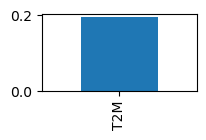

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({0.0: 1633, 1.0: 1361})
The number of classes after fit Counter({1.0: 1633, 0.0: 1633})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[338  70]
 [ 86 255]]
0.7917222963951935
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       408
         1.0       0.78      0.75      0.77       341

    accuracy                           0.79       749
   macro avg       0.79      0.79      0.79       749
weighted avg       0.79      0.79      0.79       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7881159795296417

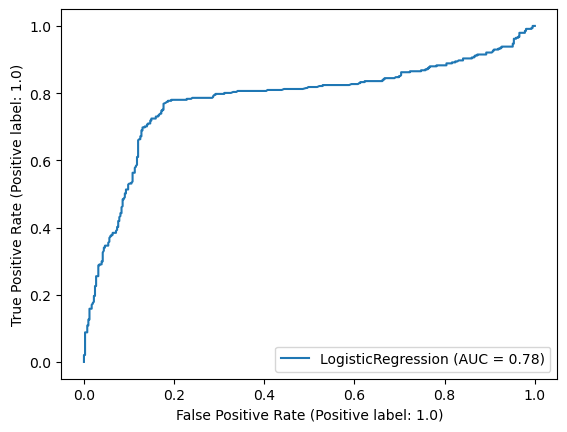

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[351  57]
 [100 241]]
0.7903871829105474
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       408
         1.0       0.81      0.71      0.75       341

    accuracy                           0.79       749
   macro avg       0.79      0.78      0.79       749
weighted avg       0.79      0.79      0.79       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7835194928411248

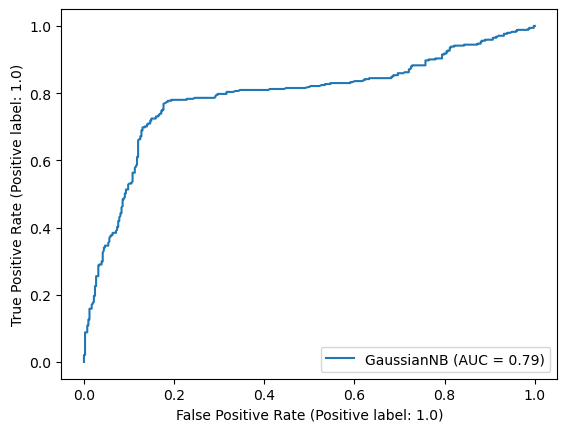

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[301 107]
 [ 96 245]]
0.7289719626168224
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       408
         1.0       0.70      0.72      0.71       341

    accuracy                           0.73       749
   macro avg       0.73      0.73      0.73       749
weighted avg       0.73      0.73      0.73       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7281100856764994

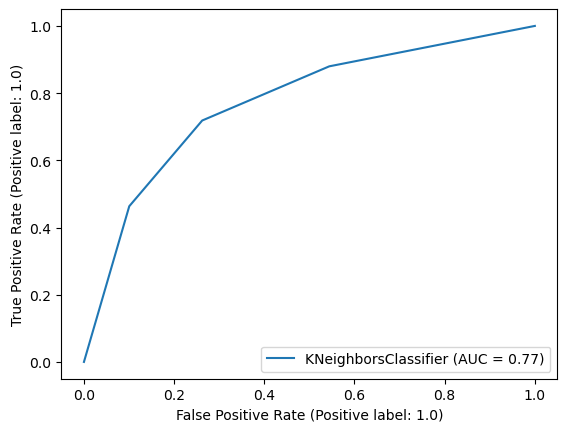

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[345  63]
 [ 94 247]]
0.7903871829105474
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.81       408
         1.0       0.80      0.72      0.76       341

    accuracy                           0.79       749
   macro avg       0.79      0.78      0.79       749
weighted avg       0.79      0.79      0.79       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7849642056235984

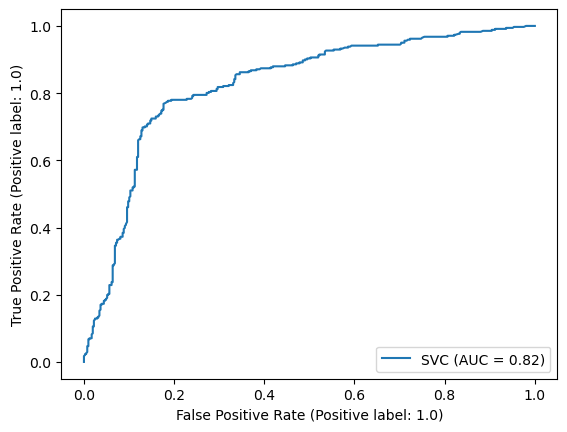

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[317  91]
 [ 64 277]]
0.7930574098798397
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       408
         1.0       0.75      0.81      0.78       341

    accuracy                           0.79       749
   macro avg       0.79      0.79      0.79       749
weighted avg       0.80      0.79      0.79       749



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[292 116]
 [111 230]]
0.6969292389853138
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72       408
         1.0       0.66      0.67      0.67       341

    accuracy                           0.70       749
   macro avg       0.69      0.70      0.69       749
weighted avg       0.70      0.70      0.70       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6950865390144326

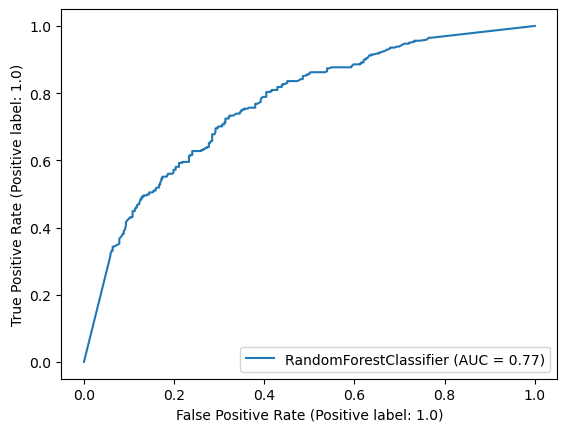

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.009044
0:	total: 48.3ms	remaining: 1m 36s
1:	total: 49.1ms	remaining: 49.1s
2:	total: 50.1ms	remaining: 33.4s
3:	total: 51ms	remaining: 25.4s
4:	total: 51.8ms	remaining: 20.7s
5:	total: 52.7ms	remaining: 17.5s
6:	total: 53.6ms	remaining: 15.3s
7:	total: 54.4ms	remaining: 13.5s
8:	total: 55.3ms	remaining: 12.2s
9:	total: 56.2ms	remaining: 11.2s
10:	total: 57ms	remaining: 10.3s
11:	total: 57.9ms	remaining: 9.59s
12:	total: 58.8ms	remaining: 8.98s
13:	total: 59.6ms	remaining: 8.45s
14:	total: 60.4ms	remaining: 8s
15:	total: 61.1ms	remaining: 7.57s
16:	total: 62ms	remaining: 7.23s
17:	total: 62.8ms	remaining: 6.91s
18:	total: 63.6ms	remaining: 6.63s
19:	total: 64.4ms	remaining: 6.38s
20:	total: 65.3ms	remaining: 6.15s
21:	total: 66.1ms	remaining: 5.94s
22:	total: 67ms	remaining: 5.75s
23:	total: 67.8ms	remaining: 5.58s
24:	total: 68.6ms	remaining: 5.42s
25:	total: 69.5ms	remaining: 5.28s
26:	total: 70.3ms	remaining: 5.14s
27:	total: 71.2ms	remaining: 5.01s
28:	total:

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[322  86]
 [ 70 271]]
0.7917222963951935
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       408
         1.0       0.76      0.79      0.78       341

    accuracy                           0.79       749
   macro avg       0.79      0.79      0.79       749
weighted avg       0.79      0.79      0.79       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7919685469495715

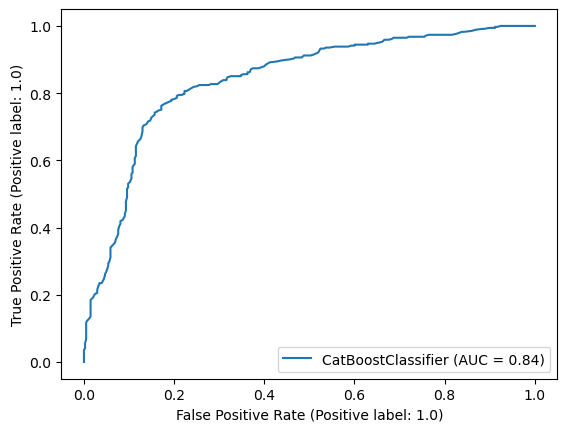

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']